<h1>What is HR Analysis</h1>
<p> HR analytics is the process of <b>collecting and analyzing Human Resource (HR) data</b> in order to <b>improve</b> an <b>organization’s workforce performance</b>. The process can also be referred to as talent analytics, people analytics, or even workforce analytics.</p><br>
<h1>Why do we need HR Analysis</h1>
<p>Once <b>organized, compared and analyzed</b>, this HR's raw data provides useful insight.<br>They can help answer questions like:<br>
   <ul>
<li>How long does it take to hire employees?</li>
<li>What amount of investment is needed to get employees up to a fully productive speed?</li>
<li>Which of our employees are most likely to leave within the year?</li>
<li>Are learning and development initiatives having an impact on employee performance?</li>

<h3>Import the Libraries</h3>


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

<h3>Import The Dataset</h3>

In [8]:
#The Dataset Used is a Kaggle Dataset (IBM HR Analytics Employee Attrition & Performance)
hrdataset = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

<h3>Checking the Dataset</h3>

In [9]:
hrdataset.head()
#5 rows and 35 columns

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
hrdataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
hrdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
#Checking for Null Values in the Dataset (There are 0 null values)
hrdataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<h3>Analyse the Data</h3>

<h4>1. How is Attrition dependant on Age</h4>

In [13]:
age_attr = hrdataset.groupby(['Age' , 'Attrition'])['DailyRate'].count().reset_index(name = 'Counts')
px.line(data_frame = age_attr , x= 'Age' , y = 'Counts' , color = 'Attrition' , title = 'Agewise Counts of People in an Organization')


We can see that the **Attrition Rate** is the highest at the age range of **28-30**<br>
The attrition rate keeps on reducing as the age increases as employees look for stability in their jobs at that time.<br>
Also at a very younger age, i.e. from 18-20, the chances of an employee leaving the organization is far more- since they are <br>exploring at that point of time.

<h4>2. Is Income a Factor in Attrition ?</h4>

In [14]:
rate_att=hrdataset.groupby(['MonthlyIncome','Attrition'])['DailyRate'].count().reset_index()
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition'])['DailyRate'].count().reset_index(name='Counts')
rate_att
fig=px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income basis counts of People in an Organization')
fig.show()

As seen in the above chart, the attrition rate is evidently high at very low income levels- less than 5k monthly. This decreases further- but a minor spike is noticed aorund 10k- indicating the middle class liveliood. They tend to shift towards a better standard of living, and hence move to a different job. When the monthly income is pretty decent, the chances of an employee leaving the organization is low- as seen by the flat line

<h4>3. Does the Department of work impact attrition?</h4

In [15]:
dept_attr = hrdataset.groupby(['Department' , 'Attrition'])['DailyRate'].count().reset_index(name = 'Count')
px.bar(dept_attr , x = 'Department' , y = 'Count',color = 'Attrition' , title='Department wise Counts of People in an Organization')

 This data comprises of only 3 major departments- among which Sales department has the highest attrition rates (25.84%), followed by the Human Resource Department (19.05%). Research and Development has the least attrition rates, that suggests the stability and content of the department as can be seen from the chart above(13.83%).

<h4>4. How does the environment satisfaction impact attrition?</h4>

In [16]:
env_attr = hrdataset.groupby(['EnvironmentSatisfaction' , 'Attrition'])['DailyRate'].count().reset_index(name  = 'Count')
px.area(env_attr , x = 'EnvironmentSatisfaction' , y = 'Count' , color = 'Attrition')

In the satisfaction Level 1-2, the chances of peope leaving the organization slightly decreases. This is indicative of the better hopes with which people stay in an organization. However, as we move from 2-3, people tend to move on to get better opportunities and experiences. The attrition rate is almost stagnant for the higher satisfaction levels.

<h4>5. How does self Job Satisfaction impact the Attrition?</h4>

In [17]:
jobsat_attr = hrdataset.groupby(['JobSatisfaction' , 'Attrition'])['DailyRate'].count().reset_index(name = 'Count')
px.area(jobsat_attr , x = 'JobSatisfaction' , y = 'Count' , color = 'Attrition')

With an increasing job satisfaction, the attrition rates decrease as can be seen in the chart above. Also from range 1-2 range we can infer (as seen above in Environment Satisfaction), the attrition level falls, but raises from 2-3, where the people tend to coose better opportunities

<h4>5. Does Company Stocks For Employees Impact Attrition</h4>

In [20]:
stock_attr = hrdataset.groupby(['StockOptionLevel' ,'Attrition'])['DailyRate'].count().reset_index(name = 'Count')
px.area(stock_attr , x = 'StockOptionLevel'  , y = 'Count' , color = 'Attrition')

The tendency of employees to leave the organization is much more when the stock availing options are limited. Since the stocks constitute to a huge amount of money while staying for a few years, people do not want to lose that opportunity. People with very limited/no stcok options have a freedom to leave the organization at will.

<h4>6. Does Work Life Balance Impact Overall Attrition Rates?</h4>

In [26]:
worklife_attr = hrdataset.groupby(['WorkLifeBalance' , 'Attrition'])['DailyRate'].count().reset_index(name = 'Count')
px.area(worklife_attr , x = 'WorkLifeBalance' , y = 'Count' , color= 'Attrition')

As per the Chart above , people with poor worklife balance have adjusted to the job. However , comparitively , people more towards attrition. And , when the worklife Balance is higher(>3) , people are more satisfied with their jobs and hence the attrition reduces

<h4>7. Does Work Experience Affect Attrition</h4>


In [34]:
workexp = hrdataset.groupby(['NumCompaniesWorked' , 'Attrition'])['DailyRate'].count().reset_index(name = 'Count')
px.line(workexp , x = 'NumCompaniesWorked' , y = 'Count' , color = 'Attrition')

As seen from the chart above, clearly, employees who started their career with the company- or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company. People who have gained much experience- working in multiple companies tend to stay in the company they join.

<h4>8. Does Work Duration in current role impact Attrition</h4>

In [37]:
work_dur_attr = hrdataset.groupby(['YearsInCurrentRole' , 'Attrition'])['DailyRate'].count().reset_index(name = 'Count')
px.line(work_dur_attr , x = 'YearsInCurrentRole' , y = 'Count' , color = 'Attrition')

We have seen people are more prone to leave the organization in the starting years on their role. When people are in the same role for a long period of time, they tend to stay longer for moving in an upward role.

<h4>9. Does Hike Percentage Impact Attrition</h4>

In [42]:
hike_perct_attr = hrdataset.groupby(['PercentSalaryHike' , 'Attrition'])['DailyRate'].count().reset_index(name = 'Count')
px.line(hike_perct_attr, x = 'PercentSalaryHike' , y = 'Count',color = 'Attrition')

Higher hikes motivate people to work better, and stay in the organization. Hence we see the chances of an employee leaving the organization where the hike is lower, is much more than a company that gives a good hike.

<h4>10. Are managers a reason for Attrition ?</h4>

In [45]:
manager_attr = hrdataset.groupby(['YearsWithCurrManager' , 'Attrition'])['DailyRate'].count().reset_index(name = 'Count')
px.line(manager_attr , x = 'YearsWithCurrManager' , y = 'Count' , color = 'Attrition')

We notice 3 major spikes in the attrition rate. At the very start, where the time spent with the manager is relatively less- people tend to leave their jobs- considering their relationship with their previous managers. At an average span of 2 years, when employees feel they need an improvement, they also tend to go for a change. When the time spent with the manager is slightly higher (about 7 years)- people tend to find their career progression stagnant, and tend to go for a change. But when the relative time spend with a manager is very high- people are satisfied with their work. Hence the chances of an employee resigning then is significantly low.

<h2>Prediction Time!</h2>

<h3>To predict if the employee will stay in the organization or resign from it</h3>
<h4>Algorithm Used : Logistic Regression</h4>

In [84]:
X=hrdataset[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=hrdataset[['Attrition']].values.ravel()

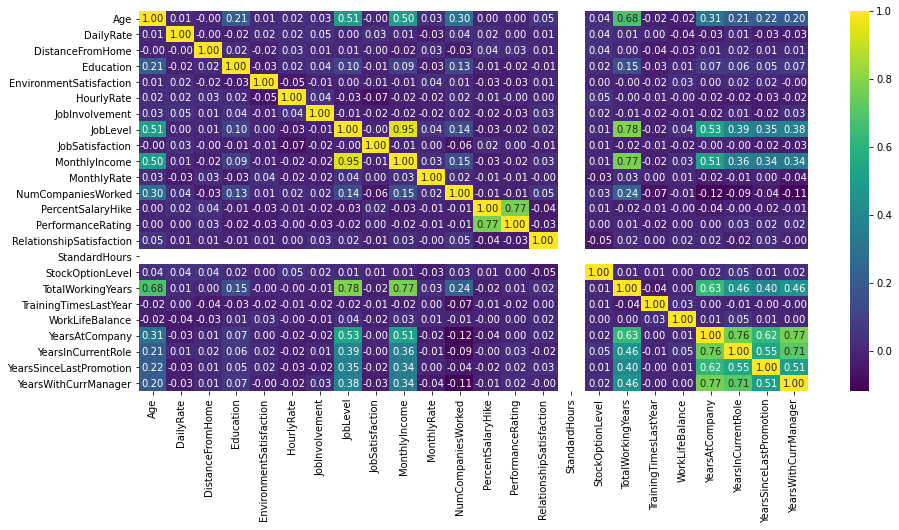

In [85]:
plt.figure(figsize=(15,7))
sns.heatmap(X.corr() , cmap = 'viridis' , annot=True , fmt = '.2f')

In [96]:
lr = LogisticRegression(C = 1000 , max_iter=10000)

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [98]:
lr.fit(X_train , y_train)

LogisticRegression(C=1000, max_iter=10000)

In [99]:
print("Coefficients" , lr.coef_)

Coefficients [[-3.76553078e-02 -2.24719629e-04  3.17799272e-02  1.82546203e-02
  -3.26390309e-01  2.32524335e-04 -3.00888964e-01 -2.59063170e-02
  -3.62053789e-01 -1.00189334e-04  1.24295018e-05  1.41349536e-01
  -4.51168500e-02  5.45922586e-02 -1.97675496e-01  6.50828071e-02
  -4.24323041e-01 -3.95833788e-02 -2.13247746e-01 -2.37810767e-01
   1.21165485e-01 -1.67923609e-01  1.39661085e-01 -1.71816196e-01]]


<h4>Predicting Test Data</h4>

In [101]:
predictions = lr.predict(X_test)

<h4>Evaluating Model</h4>

In [106]:
#Got an 83% On Test Data
print('Train Model Accuracy Score :')
print(lr.score(X_train , y_train))
print("Test Model Accuracy Score :")
print(lr.score(X_test , y_test))

Train Model Accuracy Score :
0.8566243194192378
Test Model Accuracy Score :
0.8396739130434783


<h4>Improving the Model Further</h4>

In [112]:
data_dummies = pd.get_dummies(hrdataset)
features = data_dummies[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
       'OverTime_No', 'OverTime_Yes']]
X = features.values
y = data_dummies['Attrition_Yes'].values.ravel()

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [118]:
lr2 = LogisticRegression(C = 1000 , max_iter=10000)

In [119]:
lr2.fit(X_train , y_train)

LogisticRegression(C=1000, max_iter=10000)

In [122]:
#Got an 89% On Test Data
print('Train Model Accuracy Score :')
print(lr2.score(X_train , y_train))
print("Test Model Accuracy Score :")
print(lr2.score(X_test , y_test))

Train Model Accuracy Score :
0.8901996370235935
Test Model Accuracy Score :
0.8940217391304348


<b>We have checked the data, and have come upon to infer the following observations:</b>

- People are tending to switch to a different jobs at the start of their careers, or at the earlier parts of it. Once they have settled with a family or have found stability in their jobs, they tend to stay long in the same organization- only going for vertical movements in the same organization.
- Salary and stock ptions have a great motivation on the employees and people tend to leave the organization much lesser. Higher pay and more stock options have seen more employees remain loyal to their company.
- Work life balance is a great motivation factor for the employees. However, people with a good work-life balance, tend to switch in search of better opportunities and a better standard of living.
- Departments where target meeting performance is very much crucial (for e.g. Sales) tend to have a greater chances of leaving the organization as compared to departments with more administration perspective (For e.g. Human Resources)
- People with a good Job Satisfaction and Environment satisfaction are loyal to the organization- and this speaks loud for any Organization. However, people who are not much satisfied with their current project- tend to leave the organization far more.